# Importing Libraries

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Reading and understanding the data


In [2]:
tele_churn = pd.read_csv('telecom_churn_data.csv')
tele_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking number of rows and columns in data
tele_churn.shape

(99999, 226)

In [4]:
# Checking the information of columns
tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in tele_churn.columns if column not in id_cols + date_cols + cat_cols]
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))


#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [6]:
# Checking for duplicates
tele_churn.duplicated().sum()

0

In [7]:
tele_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
tele_churn.describe(include="all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## 2. Data Cleaning & handling missing values

In [9]:
# Checking missing values 
tele_churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
# Checking missing values percentages
percentage_missing= (round(((tele_churn.isnull().sum()/len(tele_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
percentage_missing.head(50)

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


**Observation**

Many false null value columns are available. if customer did not recharge, the value assigned as NaN
Hence we can not drop these values blindly.
We can impute these columns as zero.
When customer did not recharge,the total_rechdata and date_of_last_rechdata are null

Total Recharge data in month 6,7,8,9 would be null
Maximum Recharge Data in Month 6,7,8 ,9 would be null
Average Amount recharge Data in Month 6,7,8,9, would be null
Hence this NULL can not be dropped out. We will impute with Zero.

In [11]:
# Some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

tele_churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


###### 1) Imputing with zero

In [12]:
# It is observed that the customers didn't recharged because recharge date and the recharge values are missing
tele_churn.loc[tele_churn.total_rech_data_6.isnull() & tele_churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)


,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


**Observation**

In the recharge variables where minumum value is 1, we can impute those value with zeroes since it means customer didn't recharge in that month.


In [13]:
# Creating a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

tele_churn[zero_impute] = tele_churn[zero_impute].apply(lambda x: x.fillna(0))

In [14]:
# Let's make sure that the values are imputed correctly
print("Missing value ratio:\n")
print(tele_churn[zero_impute].isnull().sum()*100/tele_churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(tele_churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count       99999.000000       99999.000000       99999.000000       99999.000000        99999.000000        99999.000000        99999.000000        99999.000000     99999.000000     99999.000000     99999.000000     99999.000000
mean            0.619726           0.681837           0.698517           0.632806           48.445409           51.393440           52.027022           49.961089        

In [15]:
# Dropping id and date columns
tele_churn = tele_churn.drop(id_cols + date_cols, axis=1)
tele_churn.shape

(99999, 212)

###### 2) Replacing NaN values in categorical variables

In [16]:
# Imputing missing values with '-1' in categorical columns
tele_churn[cat_cols] = tele_churn[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
# Checking missing value ratio
print("Missing value ratio:\n")
print(tele_churn[cat_cols].isnull().sum()*100/tele_churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


##### 3) Dropping variables with more than 50% of missing values

In [18]:
# Dropping variables with more than a given threshold of missing values

initial_cols = tele_churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(tele_churn.apply(lambda column: True if column.isnull().sum()/tele_churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':tele_churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [19]:
# Checking dropped columns
tele_churn = tele_churn.loc[:, include_cols]

dropped_cols = tele_churn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [20]:
# Imputing the respective null columns as 0. 
tele_churn[tele_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = tele_churn[tele_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [21]:
tele_churn.shape

(99999, 196)

In [22]:
# Checking columns which have only 1 value.

# Create a DataFrame of no of unique values and filter where only one value is available.

zero_variance_columns = pd.DataFrame(tele_churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(zero_variance_columns[zero_variance_columns['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


**Observation**

The above columns have just one unique value, hence they have zero variance and can be dropped.

In [23]:
# Creating columns list which have 1 unique value.
columns_tobe_dropped = list(zero_variance_columns[zero_variance_columns['nunique'] == 1]["feature"])
columns_tobe_dropped

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [24]:
# Dropping columns which are having 1 unique values
tele_churn.drop(columns=columns_tobe_dropped,inplace=True)

In [25]:
tele_churn.shape

(99999, 185)

In [26]:
# Checking missing values again
tele_churn.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [27]:
tele_churn.shape

(99999, 185)

### Filter high-value customers

Predicting the churn only for the high-value customers, who recharged with an amount greater than or equal to X, 
where X is 70th percentile of average recharge amount in first two months (the good phase).

In [28]:
#Calculating Total Data recharge amount= Total Data Recharge * Average Amount of Data recharge
tele_churn["total_data_recharge_amnt_6"] = tele_churn.total_rech_data_6 * tele_churn.av_rech_amt_data_6
tele_churn["total_data_recharge_amnt_7"] = tele_churn.total_rech_data_7 * tele_churn.av_rech_amt_data_7

In [29]:
#Calculating Total Amount recharge = total talktime recharge + total data recharge
tele_churn["total_recharge_amnt_6"] = tele_churn.total_rech_amt_6 + tele_churn.total_data_recharge_amnt_6
tele_churn["total_recharge_amnt_7"] = tele_churn.total_rech_amt_7 + tele_churn.total_data_recharge_amnt_7

In [30]:
#Calculating the Average amount of recharge of 6th and 7th month
tele_churn['average_amnt_6_7'] = (tele_churn["total_recharge_amnt_6"] + tele_churn["total_recharge_amnt_7"])/2

In [31]:
# Checking the 70th percentile of "average_amnt_6_7"
print('70th percentile of Average amount of the 6 & 7 month: ', tele_churn['average_amnt_6_7'].quantile(.70))

70th percentile of Average amount of the 6 & 7 month:  478.0


**Observation : 70th percentile of Average amount of the 6 & 7 month is 478.0**

Now filtering the data based on this 70th percentile value

In [32]:
# Filtering based on the 70th percentile .
tele_churn_highvalue = tele_churn[tele_churn["average_amnt_6_7"]>= tele_churn["average_amnt_6_7"].quantile(.70)]

In [33]:

# Delete the derived columns created in above step
tele_churn_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [34]:
tele_churn_highvalue.shape

(30001, 185)

In [35]:
tele_churn_highvalue.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,6

**After data cleaning, obtained a dataset for highvalue customers having 30001 rows and 185 columns**

## TAGGING THE CHURN CUSTOMERS AND REMOVING THE ATTRIBUTES OF CHURNING

Tagging the churned customers as churn=1, else 0, based on the fourth month as follows:

1.Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once
  in the churn phase.

2.Deciding who churn based on these below attributes 

   total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [36]:
# Calculating total call in mins by adding Incoming and Outgoing calls
tele_churn_highvalue['total_calls_9'] = tele_churn_highvalue.total_ic_mou_9 + tele_churn_highvalue.total_og_mou_9

In [37]:
# Calculating the total 2G and 3G consumption of data
tele_churn_highvalue["total_data_consumptions"] = tele_churn_highvalue.vol_2g_mb_9 + tele_churn_highvalue.vol_3g_mb_9

Customer who have not used any calls or have not consumed any data on month of 9 are tagged as Churn customer.
Churn customer is 1, while non-churn custoner is marked as 0

In [38]:
# Churner =1 where total_calls_9=0 and total_data_consumptions=0, else 0 as non-churner
tele_churn_highvalue["churn"]=tele_churn_highvalue.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [39]:
# Checking the percentages of churn and non churn data
round((tele_churn_highvalue["churn"].value_counts(normalize=True)*100),2)

0    91.86
1     8.14
Name: churn, dtype: float64

**Observation: High imbalance is observed as non-churn customers are 91.86% while only 8 % customers churn**

In [40]:
# Dropping derived columns
tele_churn_highvalue.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

Deleting columns belong to the 9th month( the Churn Month)
1. After tagging churn, removed all the attributes corresponding to the churn phase, i.e. all attributes having ‘_9’, etc. in their names.)
2. These columns havr data for users, where these users have are already churned.

Hence, making no contributions to churn prediction.

In [41]:
# Dropping all 9th month columns
tele_churn_highvalue = tele_churn_highvalue.filter(regex='[^9]$', axis =1)

In [42]:
# Checking the basic information about high value customer
tele_churn_highvalue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [43]:
tele_churn_highvalue.shape

(30001, 141)

**COMMENT: Finally have dataset with 30001 rows and 141 columns**

## 3. EDA

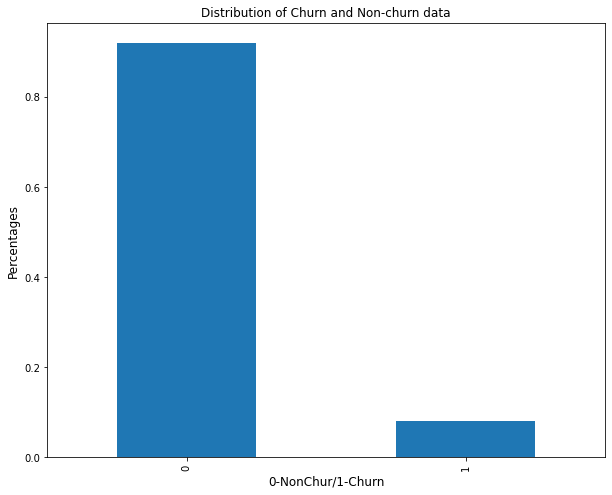

In [44]:
# Plotting the percentage of churn nad non-churn data
plt.figure(figsize=(10,8))
tele_churn_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.title("Distribution of Churn and Non-churn data", fontsize=12)
plt.ylabel("Percentages",fontsize=12)
plt.xlabel("0-NonChur/1-Churn",fontsize=12)
plt.show()

In [45]:
# Checking basic statistics
tele_churn_highvalue.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,

In [46]:
# Checking the columns associated with month 6
col=[col for col in tele_churn_highvalue.columns if "_6" in col]
col

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [47]:
# Deriving new features
#compare average revenue and calculate the difference
tele_churn_highvalue['arpu_diff'] = tele_churn_highvalue.arpu_8 - ((tele_churn_highvalue.arpu_6 + tele_churn_highvalue.arpu_7)/2)

# Check various columns related to Minutes of Usage and calculate difference
tele_churn_highvalue['onnet_mou_diff'] = tele_churn_highvalue.onnet_mou_8 - ((tele_churn_highvalue.onnet_mou_6 + tele_churn_highvalue.onnet_mou_7)/2)
tele_churn_highvalue['offnet_mou_diff'] = tele_churn_highvalue.offnet_mou_8 - ((tele_churn_highvalue.offnet_mou_6 + tele_churn_highvalue.offnet_mou_7)/2)
tele_churn_highvalue['roam_ic_mou_diff'] = tele_churn_highvalue.roam_ic_mou_8 - ((tele_churn_highvalue.roam_ic_mou_6 + tele_churn_highvalue.roam_ic_mou_7)/2)
tele_churn_highvalue['roam_og_mou_diff'] = tele_churn_highvalue.roam_og_mou_8 - ((tele_churn_highvalue.roam_og_mou_6 + tele_churn_highvalue.roam_og_mou_7)/2)
tele_churn_highvalue['loc_og_mou_diff'] = tele_churn_highvalue.loc_og_mou_8 - ((tele_churn_highvalue.loc_og_mou_6 + tele_churn_highvalue.loc_og_mou_7)/2)
tele_churn_highvalue['std_og_mou_diff'] = tele_churn_highvalue.std_og_mou_8 - ((tele_churn_highvalue.std_og_mou_6 + tele_churn_highvalue.std_og_mou_7)/2)
tele_churn_highvalue['isd_og_mou_diff'] = tele_churn_highvalue.isd_og_mou_8 - ((tele_churn_highvalue.isd_og_mou_6 + tele_churn_highvalue.isd_og_mou_7)/2)
tele_churn_highvalue['spl_og_mou_diff'] = tele_churn_highvalue.spl_og_mou_8 - ((tele_churn_highvalue.spl_og_mou_6 + tele_churn_highvalue.spl_og_mou_7)/2)
tele_churn_highvalue['total_og_mou_diff'] = tele_churn_highvalue.total_og_mou_8 - ((tele_churn_highvalue.total_og_mou_6 + tele_churn_highvalue.total_og_mou_7)/2)
tele_churn_highvalue['loc_ic_mou_diff'] = tele_churn_highvalue.loc_ic_mou_8 - ((tele_churn_highvalue.loc_ic_mou_6 + tele_churn_highvalue.loc_ic_mou_7)/2)
tele_churn_highvalue['std_ic_mou_diff'] = tele_churn_highvalue.std_ic_mou_8 - ((tele_churn_highvalue.std_ic_mou_6 + tele_churn_highvalue.std_ic_mou_7)/2)
tele_churn_highvalue['isd_ic_mou_diff'] = tele_churn_highvalue.isd_ic_mou_8 - ((tele_churn_highvalue.isd_ic_mou_6 + tele_churn_highvalue.isd_ic_mou_7)/2)
tele_churn_highvalue['spl_ic_mou_diff'] = tele_churn_highvalue.spl_ic_mou_8 - ((tele_churn_highvalue.spl_ic_mou_6 + tele_churn_highvalue.spl_ic_mou_7)/2)
tele_churn_highvalue['total_ic_mou_diff'] = tele_churn_highvalue.total_ic_mou_8 - ((tele_churn_highvalue.total_ic_mou_6 + tele_churn_highvalue.total_ic_mou_7)/2)

# Check total Recharge number
tele_churn_highvalue['total_rech_num_diff'] = tele_churn_highvalue.total_rech_num_8 - ((tele_churn_highvalue.total_rech_num_6 + tele_churn_highvalue.total_rech_num_7)/2)
# Check total recharge amount
tele_churn_highvalue['total_rech_amt_diff'] = tele_churn_highvalue.total_rech_amt_8 - ((tele_churn_highvalue.total_rech_amt_6 + tele_churn_highvalue.total_rech_amt_7)/2)
# Check maximum recharge amount
tele_churn_highvalue['max_rech_amt_diff'] = tele_churn_highvalue.max_rech_amt_8 - ((tele_churn_highvalue.max_rech_amt_6 + tele_churn_highvalue.max_rech_amt_7)/2)
# Check total recharge data
tele_churn_highvalue['total_rech_data_diff'] = tele_churn_highvalue.total_rech_data_8 - ((tele_churn_highvalue.total_rech_data_6 + tele_churn_highvalue.total_rech_data_7)/2)
# Check maximum recharge data
tele_churn_highvalue['max_rech_data_diff'] = tele_churn_highvalue.max_rech_data_8 - ((tele_churn_highvalue.max_rech_data_6 + tele_churn_highvalue.max_rech_data_7)/2)
# Check average recharge amount in Data
tele_churn_highvalue['av_rech_amt_data_diff'] = tele_churn_highvalue.av_rech_amt_data_8 - ((tele_churn_highvalue.av_rech_amt_data_6 + tele_churn_highvalue.av_rech_amt_data_7)/2)
# Check 2G data consumption difference in MB
tele_churn_highvalue['vol_2g_mb_diff'] = tele_churn_highvalue.vol_2g_mb_8 - ((tele_churn_highvalue.vol_2g_mb_6 + tele_churn_highvalue.vol_2g_mb_7)/2)
# Check 3G data consumption in MB
tele_churn_highvalue['vol_3g_mb_diff'] = tele_churn_highvalue.vol_3g_mb_8 - ((tele_churn_highvalue.vol_3g_mb_6 + tele_churn_highvalue.vol_3g_mb_7)/2)

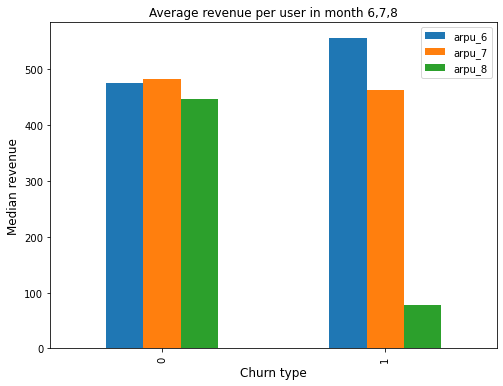

In [48]:
# Plotting the  average revenue per user(ARPU) data
tele_churn_highvalue.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7,8",fontsize=12)
plt.ylabel("Median revenue",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation- The average revenue per user for the month 6 implies that if they are unsatisfied, then they are more likely to churn**

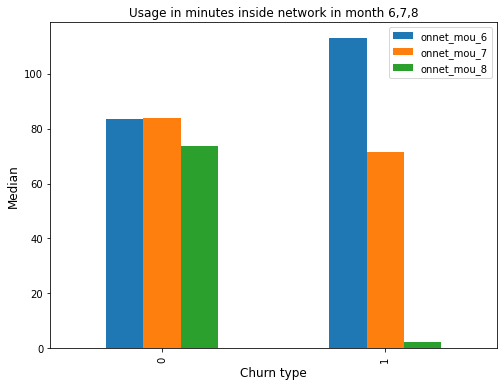

In [49]:
# Plotting the onnet_mou data
tele_churn_highvalue.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.title("Usage in minutes inside network in month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation- Customers whose usage minutes are more in the month of 6 are more likely to churn.**

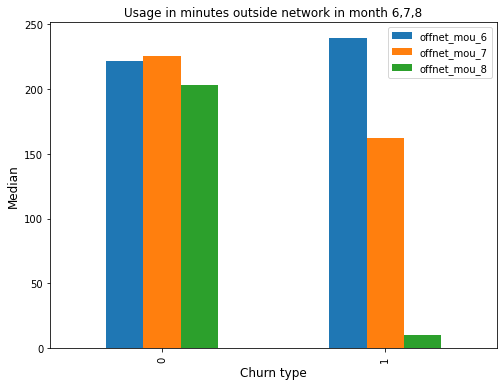

In [50]:
# Plotting the offnet_mou data
tele_churn_highvalue.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.title("Usage in minutes outside network in month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation- Customers who is having big difference in minutes of call duration to other network between month 6 and month 7 are likely to churn.**

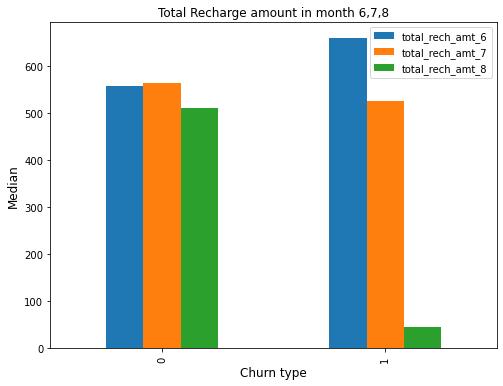

In [51]:
# Plotting the total_rech_amt data
tele_churn_highvalue.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[8,6])
plt.title("Total Recharge amount in month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation- Customers whose total recharge amount is more are more likely to churn.**

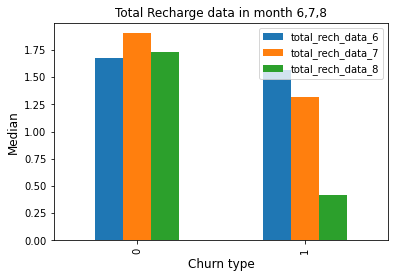

In [52]:
# Plotting total_rech_data_ data
tele_churn_highvalue.groupby("churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar()
plt.title("Total Recharge data in month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()


**Observation: Customers who have not recharge in month 6, 7, 8 may or may not churn but still there is not much evidence according to the above graph.**

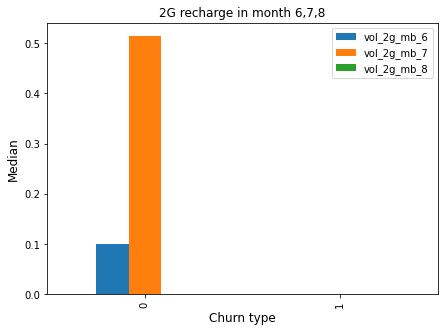

In [53]:
# Plotting the vol_2g_mb_6 data
tele_churn_highvalue.groupby("churn")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize=[7,5])
plt.title("2G recharge in month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation: Customers who have done 2G recharge in month 6, 7, 8 may or may not churn.**

In [54]:
# Checking the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(tele_churn_highvalue.churn, tele_churn_highvalue.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [55]:
# Checking the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(tele_churn_highvalue.churn, tele_churn_highvalue.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


**Observation:**
    
-Night pack users in month 8 have high churn rate that is close to 14%.

-Facebook users in month 8 have close to 2% churn rate and the Customers who are not using facebook have close to 7% churns in month 8.


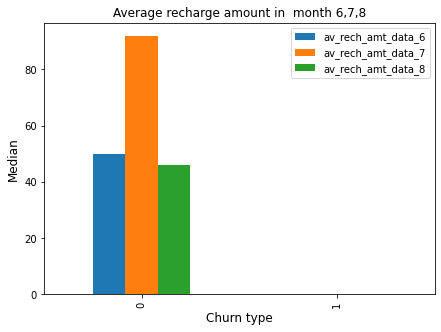

In [56]:
# Plotting av_rech_amt_data
tele_churn_highvalue.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize=[7,5])
plt.title("Average recharge amount in  month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()


**Observation: Customers whose average recharge amount in month 6,7,8 is none are more likely to churn.**

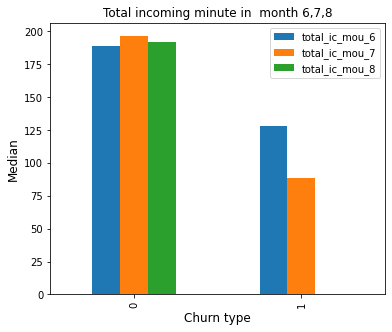

In [57]:
# Plotting total_ic_mou
tele_churn_highvalue.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[6,5])
plt.title("Total incoming minute in  month 6,7,8",fontsize=12)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation: Customers who have more difference in total incoming minutes in month 6,7,8 are more likely to churn.**

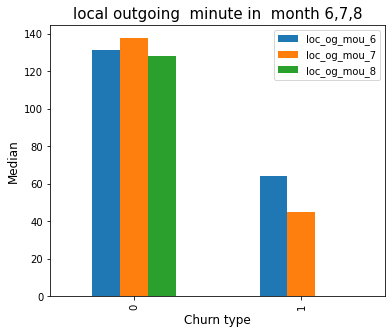

In [58]:
# Plotting loc_og_mou
tele_churn_highvalue.groupby("churn")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation: Customers whose local outgoing minute are less are more likely to churn.**


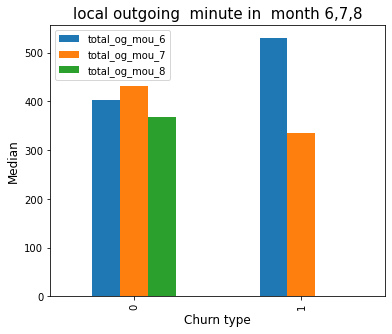

In [59]:
# Plotting total_og_mou_6
tele_churn_highvalue.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation: Customers whose total outgoing minute usage difference is showing more in between month 6 and 7 are more likely to chrun.**


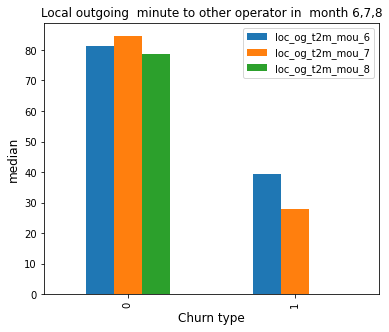

In [60]:
# Plotting loc_og_t2m_mou
tele_churn_highvalue.groupby("churn")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)

plt.show()

**Observation: Customers whose local outgoing minute is less compare to other operators are more likely to churn.**


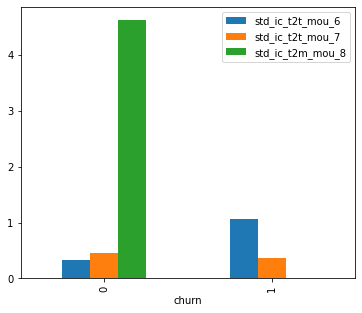

In [61]:
# Plotting std_ic_t2t_mou
tele_churn_highvalue.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.show()


**Observation: Customers who are using more STD calls are more likely to churn.**

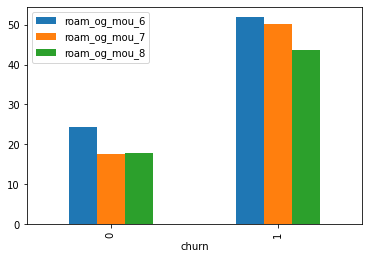

In [62]:
# Plotting roam_og_mou

tele_churn_highvalue.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar()
plt.show()

**Observation: Customers whose roaming in outgoing minutes more are more likely to churn.**


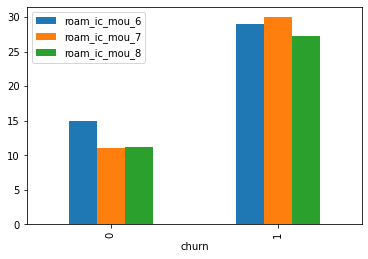

In [63]:
# Plotting roam_ic_mou

tele_churn_highvalue.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar()
plt.show()

**Observation: Customers whose roaming in incoming minutes more are likely to churn more.**


In [64]:
tele_churn_highvalue.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## 4. Modelling


In [65]:
# Creating X dataset for model building.
X = tele_churn_highvalue.drop(['churn'],axis=1)

In [66]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-

In [67]:
# Creating y dataset for model building.
y = tele_churn_highvalue['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

#### Splitting Train and Test data

In [68]:
# Splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 163)
Dimension of X_test: (9001, 163)


In [69]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.089


In [70]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [71]:
# Applying scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [72]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
15709,0.176515,0.117809,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.013726,0.012167,0.021455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.012649,0.012966,0.018143,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.020408,0.046735,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.25,0.25,0.2,0.000000,0.041667,0.000000,0.0,0.000000,0.0000,0.0,0.000000,0.0,1.0,1.0,1.0,0.564115,0.000000,0.000000,0.0,0.0,0.528646,0.454289,0.361269,0.357573,0.443610,0.458381,0.359193,0.57387,0.395551,0.362077,0.529049,0.463803,0.783397,0.785335,0.624443,0.523381,0.495893,0.432533,0.355422,0.373494,0.654162,0.461995,0.399638
28202,0.183226,0.121517,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000

### Dealing with data imbalance


#### As we have imbalance data, We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).


In [73]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, metrics
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [74]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 163)
Dimension of y_train_sm Shape: (38576,)


**Observation: The dataset is balanced**

## 1.Logistic Regression

In [75]:
# Importing libraries for Model creation
import statsmodels.api as sm

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38438
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Oct 2022   Deviance:                       26975.
Time:                        15:17:41   Pearson chi2:                 2.96e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4664.3898   4516.639     -1.033      0.302   -1.35e+04    4188.059
arpu_6                 -531.1956    525.133     -1.012      0.312   -1560.438     498.047
arpu_7                 -722.7122    718.524     -1.006      0.314   -2130.993     685.569
arpu_8                 1112.5196   1056.875      1.053      0.293    -958.917    3183.956
onnet_mou_6            -329.3833    313.555     -1.050      0.293    -943.940     285.173
onnet_mou_7            -382.0171    347.016     -1.101      0.271   -1062.157     298.122
onnet_mou_8             949.1844    912.903      1.040      0.298    -840.072    2738.441
offnet_mou_6           -211.8451    214.916     -0.986      0.324    -633.073     209.383
offnet_mou_7           -314.7527    249.067     -1.264      0.206    -802.914     173.409
offnet_mou_8            743.0603    718.236      1.035      0.301    -664.657    2150.778
roam_ic_mou_6          -288.6638    282.253     -1.023      0.306    -841.869     264.542
roam_ic_mou_7          -427.1766    415.693     -1.028      0.304   -1241.919     387.566
roam_ic_mou_8           651.9012    631.913      1.032      0.302    -586.626    1890.428
roam_og_mou_6          -462.1933    444.854     -1.039      0.299   -1334.090     409.704
roam_og_mou_7          -219.4529    223.906     -0.980      0.327    -658.301     219.396
roam_og_mou_8           848.5672    823.388      1.031      0.303    -765.243    2462.378
loc_og_t2t_mou_6       3.359e+04   2.07e+04      1.623      0.105   -6969.068    7.42e+04
loc_og_t2t_mou_7      -3.695e+04   2.37e+04     -1.557      0.119   -8.35e+04    9553.589
loc_og_t2t_mou_8       2.325e+05   3.59e+04      6.479      0.000    1.62e+05    3.03e+05
loc_og_t2m_mou_6       2.469e+04   1.52e+04      1.622      0.105   -5139.187    5.45e+04
loc_og_t2m_mou_7      -2.224e+04   1.43e+04     -1.557      0.120   -5.02e+04    5762.226
loc_og_t2m_mou_8       7.672e+04   1.18e+04      6.480      0.000    5.35e+04    9.99e+04
loc_og_t2f_mou_6       3531.4232   2177.003      1.622      0.105    -735.425    7798.271
loc_og_t2f_mou_7      -5293.9280   3392.047     -1.561      0.119   -1.19e+04    1354.362
loc_og_t2f_mou_8       2.009e+04   3099.157      6.482      0.000     1.4e+04    2.62e+04
loc_og_t2c_mou_6         -5.3024      1.069     -4.961      0.000      -7.397      -3.208
loc_og_t2c_mou_7          0.6916      1.854      0.373      0.709      -2.941       4.324
loc_og_t2c_mou_8          0.6030      1.277      0.472      0.637      -1.901       3.107
loc_og_mou_6          -1.351e+05   3.94e+04     -3.426      0.001   -2.12e+05   -5.78e+04
loc_og_mou_7           3.035e+04   3.14e+04      0.966      0.334   -3.12e+04    9.19e+04
loc_og_mou_8          -2.206e+04   2.59e+04     -0.851      0.395   -7.29e+04    2.88e+04
std_og_t2t_mou_6       

#### Logistic Regression using Feature Selection (RFE method)

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# Running RFE with 20 variables as output
rfe = RFE(logreg, step =20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [78]:
rfe.support_

array([ True,  True, False, False, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,

In [79]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_8', 'ma

#### Assessing the model with StatsModels

In [80]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38495
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Oct 2022   Deviance:                       27854.
Time:                        15:17:57   Pearson chi2:                 4.76e+12
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -27.7719     10.497     -2.646      0.008     -48.346      -7.198
arpu_6                   23.7983      2.367     10.055      0.000      19.159      28.437
arpu_7                   25.6645      3.369      7.617      0.000      19.061      32.268
onnet_mou_8              -7.0804     28.459     -0.249      0.804     -62.858      48.698
offnet_mou_7              1.6267      0.805      2.020      0.043       0.048       3.205
offnet_mou_8            -27.3998     36.572     -0.749      0.454     -99.080      44.280
roam_ic_mou_6             3.5791      0.891      4.016      0.000       1.832       5.326
roam_ic_mou_7             2.6956      1.488      1.812      0.070      -0.221       5.612
roam_og_mou_7             2.8708      0.849      3.381      0.001       1.206       4.535
roam_og_mou_8             1.8053      9.314      0.194      0.846     -16.450      20.061
loc_og_t2t_mou_8       3.452e+05   3.41e+04     10.111      0.000    2.78e+05    4.12e+05
loc_og_t2m_mou_8       1.139e+05   1.13e+04     10.111      0.000    9.18e+04    1.36e+05
loc_og_t2f_mou_6          0.1882      1.459      0.129      0.897      -2.672       3.048
loc_og_t2f_mou_7        -13.8318      2.782     -4.972      0.000     -19.284      -8.379
loc_og_t2f_mou_8       2.981e+04   2948.314     10.112      0.000     2.4e+04    3.56e+04
loc_og_t2c_mou_6         -4.0067      0.848     -4.726      0.000      -5.669      -2.345
loc_og_mou_6             -8.2306      2.609     -3.154      0.002     -13.345      -3.116
loc_og_mou_8            -1.7e+05   4.61e+04     -3.692      0.000    -2.6e+05   -7.98e+04
std_og_t2m_mou_8         15.9918      7.175      2.229      0.026       1.929      30.054
std_og_t2f_mou_7          1.4013      1.719      0.815      0.415      -1.967       4.770
std_og_t2f_mou_8         -9.4759      2.731     -3.469      0.001     -14.829      -4.123
std_og_mou_8           2.335e+05   3.73e+04      6.267      0.000     1.6e+05    3.07e+05
isd_og_mou_7             14.4400      5.109      2.826      0.005       4.426      24.453
isd_og_mou_8           2.502e+04   3993.864      6.264      0.000    1.72e+04    3.28e+04
spl_og_mou_8           1.594e+04   2544.024      6.267      0.000     1.1e+04    2.09e+04
og_others_6              -3.4100      0.665     -5.127      0.000      -4.714      -2.106
total_og_mou_7            3.6880      1.288      2.863      0.004       1.163       6.213
total_og_mou_8        -2.346e+05   3.74e+04     -6.267      0.000   -3.08e+05   -1.61e+05
loc_ic_t2t_mou_6         -1.3920      1.982     -0.702      0.483      -5.278       2.493
loc_ic_t2t_mou_8       2.239e+05    1.2e+04     18.663      0.000       2e+05    2.47e+05
loc_ic_t2m_mou_7          7.9491      1.665      4.773      0.000       4.685      11.213
loc_ic_t2m_mou_8       

In [81]:
# From the p-value of the individual columns, 
# We can drop the column 'loc_og_t2f_mou_6' as it has high p-value.
rfe_columns_1=rfe_columns.drop('loc_og_t2f_mou_6',1)

In [82]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38496
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Oct 2022   Deviance:                       27854.
Time:                        15:18:08   Pearson chi2:                 4.75e+12
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -27.7725     10.496     -2.646      0.008     -48.345      -7.200
arpu_6                   23.8269      2.357     10.110      0.000      19.208      28.446
arpu_7                   25.6663      3.369      7.617      0.000      19.062      32.270
onnet_mou_8              -7.0953     28.446     -0.249      0.803     -62.849      48.659
offnet_mou_7              1.6275      0.805      2.021      0.043       0.049       3.206
offnet_mou_8            -27.4029     36.556     -0.750      0.453     -99.051      44.245
roam_ic_mou_6             3.5797      0.891      4.016      0.000       1.833       5.327
roam_ic_mou_7             2.6951      1.488      1.811      0.070      -0.222       5.612
roam_og_mou_7             2.8748      0.849      3.387      0.001       1.211       4.538
roam_og_mou_8             1.7999      9.310      0.193      0.847     -16.448      20.048
loc_og_t2t_mou_8       3.451e+05   3.41e+04     10.110      0.000    2.78e+05    4.12e+05
loc_og_t2m_mou_8       1.138e+05   1.13e+04     10.111      0.000    9.18e+04    1.36e+05
loc_og_t2f_mou_7        -13.6610      2.441     -5.597      0.000     -18.445      -8.877
loc_og_t2f_mou_8       2.981e+04   2947.612     10.112      0.000     2.4e+04    3.56e+04
loc_og_t2c_mou_6         -4.0068      0.848     -4.725      0.000      -5.669      -2.345
loc_og_mou_6             -8.2017      2.600     -3.154      0.002     -13.298      -3.105
loc_og_mou_8            -1.7e+05    4.6e+04     -3.691      0.000    -2.6e+05   -7.97e+04
std_og_t2m_mou_8         15.9735      7.174      2.227      0.026       1.913      30.034
std_og_t2f_mou_7          1.4060      1.718      0.818      0.413      -1.962       4.774
std_og_t2f_mou_8         -9.4770      2.731     -3.470      0.001     -14.829      -4.125
std_og_mou_8           2.334e+05   3.73e+04      6.267      0.000     1.6e+05    3.06e+05
isd_og_mou_7             14.4432      5.109      2.827      0.005       4.430      24.457
isd_og_mou_8           2.501e+04   3993.022      6.264      0.000    1.72e+04    3.28e+04
spl_og_mou_8           1.594e+04   2543.489      6.267      0.000     1.1e+04    2.09e+04
og_others_6              -3.4103      0.665     -5.127      0.000      -4.714      -2.107
total_og_mou_7            3.6959      1.287      2.872      0.004       1.174       6.218
total_og_mou_8        -2.345e+05   3.74e+04     -6.267      0.000   -3.08e+05   -1.61e+05
loc_ic_t2t_mou_6         -1.4042      1.980     -0.709      0.478      -5.286       2.477
loc_ic_t2t_mou_8       2.239e+05    1.2e+04     18.664      0.000       2e+05    2.47e+05
loc_ic_t2m_mou_7          7.9462      1.665      4.772      0.000       4.683      11.210
loc_ic_t2m_mou_8       2.467e+05   1.32e+04     18.663      0.000    2.21e+05    2.73e+05
loc_ic_t2f_mou_8       

In [83]:
# From the p-value of the individual columns, 
# We can drop the column 'loc_ic_t2t_mou_6' as it has high p-value.
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2t_mou_6',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'

In [84]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38497
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Oct 2022   Deviance:                       27855.
Time:                        15:18:18   Pearson chi2:                 4.74e+12
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -28.4117     10.453     -2.718      0.007     -48.898      -7.925
arpu_6                   23.8789      2.356     10.134      0.000      19.260      28.497
arpu_7                   25.6638      3.370      7.615      0.000      19.059      32.269
onnet_mou_8              -6.9076     28.480     -0.243      0.808     -62.727      48.912
offnet_mou_7              1.6439      0.805      2.042      0.041       0.066       3.222
offnet_mou_8            -27.1746     36.600     -0.742      0.458     -98.910      44.561
roam_ic_mou_6             3.5743      0.891      4.010      0.000       1.827       5.321
roam_ic_mou_7             2.7213      1.491      1.826      0.068      -0.200       5.643
roam_og_mou_7             2.8749      0.849      3.386      0.001       1.211       4.539
roam_og_mou_8             1.7290      9.321      0.185      0.853     -16.541      19.999
loc_og_t2t_mou_8       3.454e+05   3.41e+04     10.120      0.000    2.78e+05    4.12e+05
loc_og_t2m_mou_8       1.139e+05   1.13e+04     10.120      0.000    9.19e+04    1.36e+05
loc_og_t2f_mou_7        -13.6185      2.439     -5.584      0.000     -18.399      -8.838
loc_og_t2f_mou_8       2.983e+04   2947.210     10.121      0.000    2.41e+04    3.56e+04
loc_og_t2c_mou_6         -4.0068      0.848     -4.726      0.000      -5.669      -2.345
loc_og_mou_6             -8.1177      2.601     -3.121      0.002     -13.215      -3.020
loc_og_mou_8          -1.703e+05    4.6e+04     -3.700      0.000   -2.61e+05   -8.01e+04
std_og_t2m_mou_8         15.9616      7.175      2.225      0.026       1.899      30.024
std_og_t2f_mou_7          1.4027      1.718      0.816      0.414      -1.965       4.770
std_og_t2f_mou_8         -9.4715      2.730     -3.469      0.001     -14.822      -4.121
std_og_mou_8           2.333e+05   3.72e+04      6.265      0.000     1.6e+05    3.06e+05
isd_og_mou_7             14.5031      5.111      2.838      0.005       4.487      24.520
isd_og_mou_8             2.5e+04   3992.535      6.262      0.000    1.72e+04    3.28e+04
spl_og_mou_8           1.593e+04   2543.178      6.264      0.000    1.09e+04    2.09e+04
og_others_6              -3.4023      0.665     -5.116      0.000      -4.706      -2.099
total_og_mou_7            3.7099      1.287      2.883      0.004       1.188       6.232
total_og_mou_8        -2.344e+05   3.74e+04     -6.265      0.000   -3.08e+05   -1.61e+05
loc_ic_t2t_mou_8       2.238e+05    1.2e+04     18.661      0.000       2e+05    2.47e+05
loc_ic_t2m_mou_7          8.4098      1.534      5.483      0.000       5.404      11.416
loc_ic_t2m_mou_8       2.467e+05   1.32e+04     18.660      0.000    2.21e+05    2.73e+05
loc_ic_t2f_mou_8       8.882e+04   4759.551     18.661      0.000    7.95e+04    9.81e+04
loc_ic_mou_8          -

In [85]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([8.36387099e-02, 4.58057453e-01, 2.79184039e-01, 4.66726854e-01,
       6.62769523e-01, 4.27486504e-01, 9.85169812e-06, 3.30913060e-01,
       7.33844277e-03, 6.88080502e-01])

#### Creating a dataframe with the actual churn flag and predicted probabilities

In [86]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.083639
1,0,0.458057
2,0,0.279184
3,0,0.466727
4,0,0.662770


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [87]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.083639,0
1,0,0.458057,0
2,0,0.279184,0
3,0,0.466727,0
4,0,0.662770,1


In [88]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[16161  3127]
 [ 2607 16681]]


In [89]:
# Checking the overall accuracy.
print("Accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

Accuracy of the model is: 0.8513583575279967


In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,std_og_t2m_mou_8,3.627229e+09
32,std_ic_t2t_mou_8,2.398984e+09
10,loc_og_t2m_mou_8,1.523439e+09
9,loc_og_t2t_mou_8,1.273173e+09
30,loc_ic_mou_8,1.113120e+09
28,loc_ic_t2m_mou_8,5.901710e+08
31,std_ic_t2t_mou_7,4.305404e+07
13,loc_og_t2c_mou_6,9.866111e+06
76,total_rech_data_diff,2.142002e+05
26,loc_ic_t2t_mou_8,7.303064e+04


In [92]:
# Defining true positives, true negatives, false positives, false negatives
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
print("Sensitivity = ",TP / float(TP+FN))

print("Specificity = ",TN / float(TN+FP))

print("False Positive Rate = ",FP/ float(TN+FP))

print ("Precision = ",TP / float(TP+FP))

print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8648382413936127
Specificity =  0.8378784736623808
False Positive Rate =  0.16212152633761925
Precision =  0.8421344911147012
True Negative Prediction Rate =  0.8610933503836317


### Plotting the ROC Curve

In [94]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

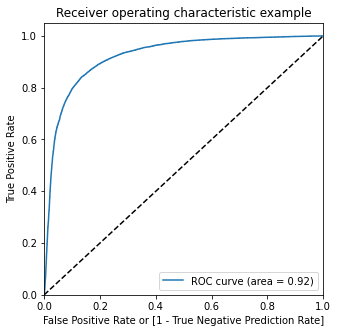

In [96]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Checking Optimal Cutoff Point

In [97]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083639,0,1,0,0,0,0,0,0,0,0,0
1,0,0.458057,0,1,1,1,1,1,0,0,0,0,0
2,0,0.279184,0,1,1,1,0,0,0,0,0,0,0
3,0,0.466727,0,1,1,1,1,1,0,0,0,0,0
4,0,0.662770,1,1,1,1,1,1,1,1,0,0,0


In [98]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500181     1.000000     0.000363
0.1          0.1  0.731984     0.980558     0.483409
0.2          0.2  0.790103     0.958523     0.621682
0.3          0.3  0.824554     0.934571     0.714538
0.4          0.4  0.842804     0.904397     0.781211
0.5          0.5  0.851358     0.864838     0.837878
0.6          0.6  0.850684     0.817555     0.883814
0.7          0.7  0.837671     0.755755     0.919587
0.8          0.8  0.807108     0.665491     0.948725
0.9          0.9  0.690040     0.401338     0.978743


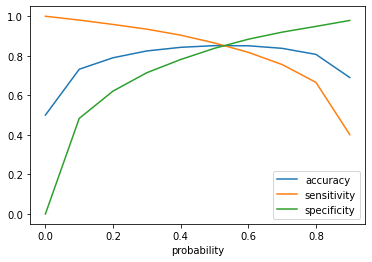

In [99]:
# Plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Observation**

Initially we have selected the optimum point of classification as 0.5.

We can see from the above graph that the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. 

In [100]:
# Creating columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.083639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.458057,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.279184,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.466727,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.662770,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1


In [101]:
# Again calculating accuracy sensitivity and specificity for refined probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.851358     0.864838     0.837878
0.51         0.51  0.852058     0.860587     0.843530
0.52         0.52  0.852006     0.855143     0.848870
0.53         0.53  0.852162     0.850736     0.853588
0.54         0.54  0.852421     0.846640     0.858202
0.55         0.55  0.853406     0.843374     0.863438
0.56         0.56  0.853199     0.838708     0.867690
0.57         0.57  0.852758     0.833368     0.872148
0.58         0.58  0.851825     0.827820     0.875830
0.59         0.59  0.851047     0.822584     0.879511


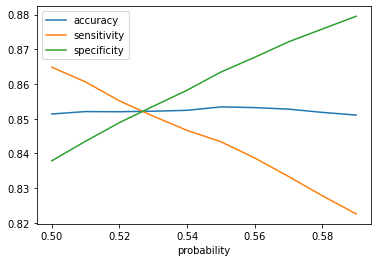

In [102]:
# Plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Observation**

We can conclude from the above graph that the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [103]:
# Taking 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.083639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.458057,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.279184,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.466727,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.662770,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1


In [104]:
# Checking the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8521619659892161


In [105]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16464  2824]
 [ 2879 16409]]


In [106]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print("Sensitivity = ",TP2 / float(TP2+FN2))

print("Specificity = ",TN2 / float(TN2+FP2))

print("False Positive Rate = ",FP2/ float(TN2+FP2))

print ("Precision = ",TP2 / float(TP2+FP2))

print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8507362090418913
Specificity =  0.8535877229365408
False Positive Rate =  0.14641227706345913
Precision =  0.8531690323922425
True Negative Prediction Rate =  0.8511606265832601


#### Precision and recall tradeoff


In [107]:
from sklearn.metrics import precision_recall_curve

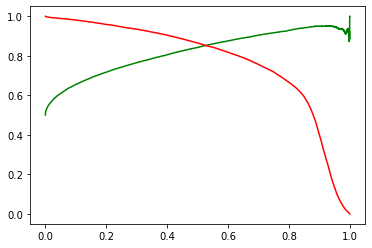

In [108]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set


#### Transforming and feature selection for test data

In [109]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_6,arpu_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_mou_6,loc_og_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_7,isd_og_mou_8,spl_og_mou_8,og_others_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_7,std_ic_mou_6,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,sachet_3g_7,aon,aug_vbc_3g,sep_vbc_3g,arpu_diff,roam_og_mou_diff,loc_og_mou_diff,isd_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff
35865,198.085,66.027,0.75,5.56,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.46,0.00,0.00,0.00,0.0,0.75,0.0,0.0,0.00,0.00,5.56,0.75,0.65,9.51,10.88,3.46,14.99,0.24,0.10,0.00,8.58,57.11,21.23,72.11,0.0,0.00,5.0,7.0,2.0,10.0,25.0,10.0,10.0,0.0,1.0,0.0,17.0,25.0,0.0,125.0,0.0,323.22,0.00,0.00,0.0,0.0,0.0,0.0,0.0,232.0,0.00,0.00,-115.0730,0.00,-9.23,0.0,-93.850,-7.680,52.700,44.640,-4.0,-149.0,-3.0,-71.0,-204.775
41952,236.830,486.684,22.13,230.78,105.19,0.0,0.00,0.00,0.00,22.13,19.08,1.36,0.38,0.00,44.18,41.59,85.73,10.34,0.0,85.73,0.0,0.0,0.00,0.00,276.19,127.33,92.33,48.49,26.38,0.00,118.71,69.16,23.85,133.76,106.79,51.73,581.04,170.44,0.0,0.00,3.0,6.0,4.0,345.0,150.0,145.0,86.0,50.0,2.0,1.0,152.0,145.0,145.0,145.0,145.0,22.61,37.86,292.16,0.0,0.0,0.0,0.0,0.0,1317.0,148.18,0.00,-39.4030,0.00,-3.07,0.0,-78.405,-133.310,-103.130,-260.085,-0.5,-18.5,-0.5,-79.5,11.975
98938,725.515,611.563,87.71,246.11,263.18,0.0,0.00,0.00,0.00,87.71,261.48,1.06,1.70,0.00,114.71,350.89,0.00,1.13,0.0,0.00,0.0,0.0,0.00,0.00,555.21,350.89,186.83,1009.51,797.29,4.03,988.16,17.11,0.23,32.79,81.61,22.08,1213.51,1019.46,0.0,9.21,7.0,11.0,7.0,566.0,252.0,252.0,30.0,130.0,2.0,2.0,252.0,252.0,252.0,252.0,504.0,199.95,467.01,1590.69,0.0,0.0,0.0,0.0,0.0,2444.0,1602.15,161.19,-165.5700,0.00,17.98,0.0,15.830,191.745,-43.680,152.800,-2.0,-208.5,0.5,126.0,337.675
29459,337.420,262.087,3.19,37.01,8.03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.06,148.86,0.00,0.00,0.00,0.0,3.19,0.0,0.0,8.03,1.15,44.88,11.23,0.00,2.19,0.00,0.20,0.20,0.00,67.83,0.00,0.00,67.83,2.49,68.03,0.0,0.00,9.0,10.0,5.0,296.0,179.0,154.0,0.0,154.0,2.0,3.0,179.0,179.0,154.0,259.0,256.0,7.58,67.87,1032.04,1.0,0.0,1.0,2.0,0.0,278.0,520.38,0.00,-49.3165,0.00,-78.36,0.0,-92.855,-7.090,67.830,60.740,-4.5,-56.0,0.0,-40.0,61.060
70682,327.199,1163.314,424.78,2345.36,1895.68,0.0,2.75,208.94,110.01,45.76,148.09,0.00,0.93,1.06,89.26,194.79,1637.18,0.00,0.0,2016.19,0.0,0.0,1.81,0.00,2231.29,2212.81,49.23,448.46,304.41,3.11,356.76,9.89,9.86,15.06,5.01,14.01,550.01,371.81,0.5,0.53,5.0,15.0,12.0,1237.0,110.0,130.0,0.0,130.0,0.0,1.0,0.0,0.0,23.0,0.0,23.0,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,548.0,0.00,0.00,272.3445,5.54,-19.06,0.0,722.850,15.450,-0.975,15.475,2.0,320.0,1.0,23.0,0.000


In [110]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

#### Predicting the target variable

In [111]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.0
41952    0.0
98938    0.0
29459    0.0
70682    0.0
58317    0.0
4860     0.0
16890    1.0
61329    0.0
94332    0.0
dtype: float64


In [112]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.0
41952,0.0
98938,0.0
29459,0.0
70682,0.0


In [113]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [114]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [115]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.0
41952,0,0.0
98938,0,0.0
29459,0,0.0
70682,0,0.0


In [116]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.52 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.0,0
41952,0,0.0,0
98938,0,0.0,0
29459,0,0.0,0
70682,0,0.0,0


In [117]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.9370069992223087

#### Evaluating the Metrics 

In [118]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[8078  194]
 [ 373  356]]


In [119]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [120]:
print("Sensitivity = ",TP3 / float(TP3+FN3))

print("Specificity = ",TN3 / float(TN3+FP3))

print("False Positive Rate = ",FP3/ float(TN3+FP3))

print ("Precision = ",TP3 / float(TP3+FP3))

print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.4883401920438957
Specificity =  0.9765473887814313
False Positive Rate =  0.023452611218568665
Precision =  0.6472727272727272
True Negative Prediction Rate =  0.9558632114542658


#### Evaluating the results

In [121]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  94.0 %
The sensitivity of the predicted model is:  49.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



In [122]:
# acc = round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100
results = pd.DataFrame({'S.NO.':1,'Model':['Logistic Regression'],
                        'Accuracy':[metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)],
                       'Sensitivity' :[TP / float(TP+FN)]})
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838


### ROC curve for the test dataset

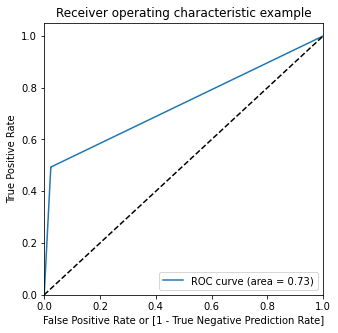

In [123]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**AUC score for train dataset is 0.92 and the test dataset is 0.87. This model can be considered as a good model.**

## 2.Logistic Regression using PCA - Dimensionality Reduction


In [124]:
# Splitting the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# Apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 163)
Dimension of X_test: (9001, 163)
Dimension of X_train_sm Shape: (38576, 163)
Dimension of y_train_sm Shape: (38576,)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.176515,0.117809,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.013726,0.012167,0.021455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.012649,0.012966,0.018143,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.020408,0.046735,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.25,0.25,0.2,0.000000,0.041667,0.000000,0.0,0.000000,0.0000,0.0,0.000000,0.0,1.0,1.0,1.0,0.564115,0.000000,0.000000,0.0,0.0,0.528646,0.454289,0.361269,0.357573,0.443610,0.458381,0.359193,0.57387,0.395551,0.362077,0.529049,0.463803,0.783397,0.785335,0.624443,0.523381,0.495893,0.432533,0.355422,0.373494,0.654162,0.461995,0.399638
1,0.183226,0.121517,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.00000

In [125]:
# Importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# Applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [126]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 163)
Dimension of X_test_pca:  (9001, 163)


In [127]:
# Checking the PCA components
pca.components_

array([[-9.88141359e-03, -3.96684379e-03,  1.04125288e-03, ...,
        -3.32044998e-03, -4.02796356e-03, -7.83217812e-04],
       [-2.28711297e-04,  1.23077746e-02,  2.53180370e-02, ...,
         3.29103664e-02,  2.15461567e-02,  1.60521503e-02],
       [ 1.45709348e-02, -5.48975966e-03,  9.04706456e-03, ...,
         1.86678241e-02,  1.02991622e-02,  6.62331391e-03],
       ...,
       [-0.00000000e+00,  1.06552607e-15, -1.44272972e-16, ...,
        -1.45297823e-02, -4.28309382e-01,  1.14960901e-02],
       [-0.00000000e+00, -1.31663738e-15,  1.32080632e-17, ...,
        -1.56385934e-02, -3.06835882e-01,  4.20845170e-03],
       [ 3.25131010e-01,  4.44891214e-01, -6.54367809e-01, ...,
         3.19143833e-03, -5.66716588e-04,  4.31985264e-04]])

### Performing Logistic Regression


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# Making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# Converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6768 1504]
 [ 129  600]] 

Accuracy of the logistic regression model with PCA:  0.8185757138095767


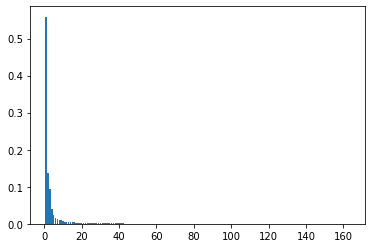

In [130]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

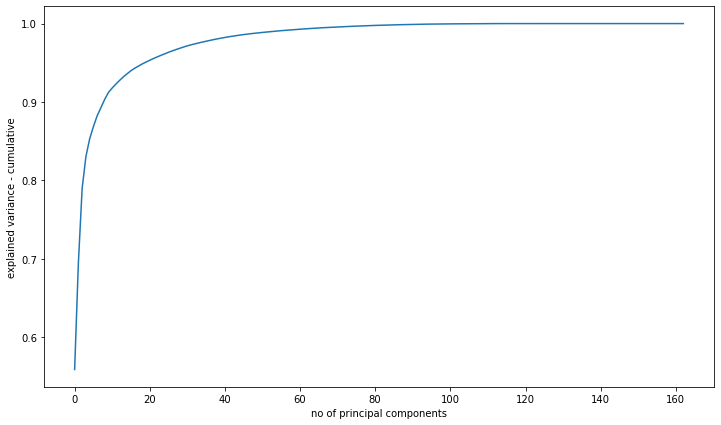

In [131]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [132]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([55.9, 69.5, 79. , 83.1, 85.4, 87. , 88.4, 89.5, 90.5, 91.4, 92. ,
       92.5, 93. , 93.4, 93.8, 94.2, 94.5, 94.8, 95.1, 95.3, 95.5, 95.7,
       95.9, 96.1, 96.3, 96.5, 96.7, 96.9, 97.1, 97.3, 97.5, 97.6, 97.7,
       97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99

**90% of the data can be explained with 8 PCA components**

In [133]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [134]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# Making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# Converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [135]:
# Checking the Confusion matrix
print("Confusion Matrix for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matrix for y_test & y_pred
 [[6662 1610]
 [ 159  570]] 

Accuracy of the logistic regression model with PCA:  0.8034662815242751


In [136]:
acc1=accuracy_score(y_test,y_pred_8)
results1 = pd.DataFrame({'S.NO.':2,'Model':['Logistic Regression with PCA'],'Accuracy':[acc1],
                        'Sensitivity' :[TP / float(TP+FN)]})
results = pd.concat([results,results1])
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838
0,2,Logistic Regression with PCA,0.803466,0.864838


## 3.Decision tree 

In [137]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#### Hyperparameter tuning

In [138]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Initiating the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'f1_micro',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm_pca, y_train_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='f1_micro', verbose=1)

In [139]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.379151,0.162567,0.011085,0.004275,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.787066,0.795852,0.788334,0.788205,0.792223,0.790336,0.003263,7
1,4.090814,0.214975,0.012496,0.006248,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.787066,0.795852,0.788334,0.788205,0.792223,0.790336,0.003263,7
2,4.045306,0.062236,0.007839,0.006986,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.787195,0.795593,0.788334,0.788205,0.793260,0.790518,0.003299,5
3,4.084460,0.104518,0.006322,0.007745,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.787195,0.795593,0.788334,0.788205,0.793260,0.790518,0.003299,5
4,6.714359,0.117833,0.011048,0.006279,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.836703,0.844200,0.837200,0.830979,0.830719,0.835960,0.004945,2
5,7.067178,0.301078,0.011254,0.006448,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.836703,0.844200,0.837330,0.830979,0.830719,0.835986,0.004952,1
6,6.486611,0.237649,0.010980,0.006226,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.819984,0.822165,0.821776,0.820480,0.819183,0.820718,0.001110,3
7,6.341261,0.049053,0.009975,0.005790,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.819984,0.822165,0.821776,0.820480,0.819183,0.820718,0.001110,3


In [140]:
# Checking the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8359860867672093
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameters


In [141]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_sm_pca, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set


In [142]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_sm_pca)

In [143]:
confusion2 = metrics.confusion_matrix(y_train_sm, y_train_pred )
print(confusion2)

[[16721  2567]
 [ 2488 16800]]


In [144]:
# Calculating model validation parameters
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8689599751140605
Sensitivity:- 0.8648382413936127
Specificity:- 0.8378784736623808


#### Prediction on the test set

In [146]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [147]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6983 1289]
 [ 247  482]]


In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8293522941895345
Sensitivity:- 0.8648382413936127
Specificity:- 0.8378784736623808


**Observation:**
    
We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

In [149]:
acc2=accuracy_score(y_test,y_test_pred)
results1 = pd.DataFrame({'S.NO.':3,'Model':['Decision Tree with PCA'],'Accuracy':[acc2],
                                                        'Sensitivity' :[TP / float(TP+FN)]})
results = pd.concat([results,results1])
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838
0,2,Logistic Regression with PCA,0.803466,0.864838
0,3,Decision Tree with PCA,0.829352,0.864838


## 4.Random Forest

In [150]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [151]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_sm_pca, y_train_sm)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [152]:
# Checking the optimal accuracy score and hyperparameters
print('Accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy of 0.8205100586995687 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


#### Model with optimal hyperparameters

In [153]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [154]:
rfc_model.fit(X_train_sm_pca, y_train_sm)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [155]:
y_train_pred = rfc_model.predict(X_train_sm_pca)

In [156]:
confusion = metrics.confusion_matrix(y_train_sm, y_train_pred)
print(confusion)

[[15517  3771]
 [ 3335 15953]]


In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8157922024056408
Sensitivity:- 0.827094566569888
Specificity:- 0.8044898382413936


#### Prediction on the test set


In [159]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [160]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6583 1689]
 [ 172  557]]


In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7932451949783358
Sensitivity:- 0.7640603566529492
Specificity:- 0.7958172147001934


In [163]:
acc3=accuracy_score(y_test,y_test_pred)
results1 = pd.DataFrame({'S.NO.':4,'Model':['Random Forest with PCA'],'Accuracy':[acc3],
                        'Sensitivity' :[TP / float(TP+FN)]})
results = pd.concat([results,results1])
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838
0,2,Logistic Regression with PCA,0.803466,0.864838
0,3,Decision Tree with PCA,0.829352,0.864838
0,4,Random Forest with PCA,0.793245,0.764060


## 5. Support Vector Machines (SVM) with PCA

In [164]:
from sklearn.svm import SVC

In [165]:
# Specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# Specify model with RBF kernel
model = SVC(kernel="rbf")

# Set up GridSearchCV()
grid_search = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# Fit the model
grid_search.fit(X_train_sm_pca, y_train_sm)   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [166]:
# CV Results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,148.671001,0.996826,105.671231,0.678804,1,0.01,"{'C': 1, 'gamma': 0.01}",0.802084,0.803017,0.798880,0.801327,0.001772,7,0.802232,0.799938,0.801967,0.801379,0.001025
1,173.600687,0.921177,129.023750,0.485656,1,0.001,"{'C': 1, 'gamma': 0.001}",0.694455,0.687301,0.687587,0.689781,0.003307,10,0.687911,0.691060,0.690645,0.689872,0.001397
2,212.820991,6.131624,189.088403,13.498760,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.688389,0.684812,0.683854,0.685685,0.001952,12,0.684489,0.686200,0.686484,0.685724,0.000881
3,117.994469,12.719557,93.553627,8.461053,10,0.01,"{'C': 10, 'gamma': 0.01}",0.836301,0.837857,0.837144,0.837101,0.000636,6,0.839872,0.838045,0.838596,0.838838,0.000765
4,144.544993,5.249518,111.360195,5.822998,10,0.001,"{'C': 10, 'gamma': 0.001}",0.801306,0.802317,0.798180,0.800601,0.001761,8,0.801726,0.799588,0.800723,0.800679,0.000874
5,159.319819,0.743737,134.274018,6.334345,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.694455,0.687301,0.687587,0.689781,0.003307,10,0.687911,0.690983,0.690606,0.689833,0.001368
6,158.942836,43.659778,122.722937,32.587661,100,0.01,"{'C': 100, 'gamma': 0.01}",0.851544,0.854577,0.851610,0.852577,0.001414,2,0.856204,0.853715,0.853993,0.854638,0.001113
7,135.192359,41.587723,78.151600,2.321264,100,0.001,"{'C': 100, 'gamma': 0.001}",0.836068,0.839879,0.836600,0.837516,0.001685,5,0.839406,0.837073,0.839140,0.838539,0.001043
8,130.668501,1.853767,102.786904,0.968955,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.801151,0.802084,0.797558,0.800264,0.001951,9,0.801454,0.799704,0.800684,0.800614,0.000716
9,109.534209,1.878331,68.674737,1.591236,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.861420,0.864220,0.862343,0.862661,0.001165,1,0.869503,0.865692,0.868108,0.867768,0.001574


In [ ]:
# Plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 0.90])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 0.90])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 0.90])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [168]:
# Printing the best score 
best_score = grid_search.best_score_
best_hyperparams = grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8626607134435155 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


We can see sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), however from the plots it is clear that for higher gamma vales the model overfits, perfitting is obtained with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy
(but not considering subjective parameters such as model complexity)

In [169]:
# Building model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_sm_pca, y_train_sm)

SVC(C=100, gamma=0.0001)

In [170]:
# Making predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_sm_pca)

In [171]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm, y_train_pred)
print(confusion)

[[15742  3546]
 [ 3823 15465]]


In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8089744919120697
Sensitivity:- 0.8017938614682705
Specificity:- 0.816155122355869


In [174]:
# Making on prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [175]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6745 1527]
 [ 160  569]]


In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8125763804021775
Sensitivity:- 0.7805212620027435
Specificity:- 0.8154013539651838


In [178]:
acc5=accuracy_score(y_test,y_test_pred)
results1 = pd.DataFrame({'S.NO.':5,'Model':['SVM with PCA'],'Accuracy':[acc5],
                        'Sensitivity' :[TP / float(TP+FN)]})
results = pd.concat([results,results1])
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838
0,2,Logistic Regression with PCA,0.803466,0.864838
0,3,Decision Tree with PCA,0.829352,0.864838
0,4,Random Forest with PCA,0.793245,0.764060
0,5,SVM with PCA,0.812576,0.780521


## 6. XGBOOST

In [179]:
#pip install xgboost

In [180]:
import xgboost as xgb
xgb_pca = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
xgb_pca.fit(X_train_sm_pca, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [181]:
# Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
xgb_pca_search = GridSearchCV(estimator=xgb_pca ,
                              param_grid=parameters,
                              scoring='roc_auc', 
                              cv=4, 
                              n_jobs=-1, 
                              verbose=1)
xgb_pca_search.fit(X_train_sm_pca, y_train_sm)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [182]:
print('Best Parameters :', xgb_pca_search.best_params_)

Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 25, 'n_estimators': 500}


In [183]:
# Modelling using the best PCA-XGBoost Estimator 
xgb_pca_best = xgb_pca_search.best_estimator_
xgb_pca_best_fit = xgb_pca_best.fit(X_train_sm_pca, y_train_sm)

In [184]:
# Prediction on Train set
y_train_pred_xgb_pca_best = xgb_pca_best_fit.predict(X_train_sm_pca)
y_train_pred_xgb_pca_best[:5]

array([1, 1, 1, 0, 1])

In [185]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm, y_train_pred)
print(confusion)

[[15742  3546]
 [ 3823 15465]]


In [186]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [187]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8089744919120697
Sensitivity:- 0.8017938614682705
Specificity:- 0.816155122355869


In [188]:
# Making on prediction on the test set
y_test_pred = xgb_pca_best_fit.predict(X_test_pca)

In [189]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6107 2165]
 [ 125  604]]


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7455838240195534
Sensitivity:- 0.8285322359396433
Specificity:- 0.7382736943907157


In [192]:
acc6=accuracy_score(y_test,y_test_pred)
results1 = pd.DataFrame({'S.NO.':6,'Model':['XGBoost with PCA'],'Accuracy':[acc6],
                        'Sensitivity' :[TP / float(TP+FN)]},)
results = pd.concat([results,results1])
results

,S.NO.,Model,Accuracy,Sensitivity
0,1,Logistic Regression,0.937007,0.864838
0,2,Logistic Regression with PCA,0.803466,0.864838
0,3,Decision Tree with PCA,0.829352,0.864838
0,4,Random Forest with PCA,0.793245,0.764060
0,5,SVM with PCA,0.812576,0.780521
0,6,XGBoost with PCA,0.745584,0.828532


## Conclusion

**Conclusion with PCA**

After running various models on the given dataset, the Logistic Regression worked the best in this case. As off all the models the best sensitivity, which was our ultimate goal, was acheived with the  Logistic regression model. The sensitivity of the model was approx 86%. Also we have good accuracy of approx 94%.


**Conclusion with no PCA**

The Logistic model without PCA has shown better sensitivity and accuracy, in comparison to models with PCA. So, we choose to go for the more simplistic model, i.e., Logistic Regression without PCA as it explains the important predictor variables as well as the significance of each variable. The model hels to identify the variables which should be acted upon on order to make the decision of the to be churned customers. Hence, the model serves to be more relevant in terms of explaining the impostant aspects of the data to the business.

## Recommendation


1. Target those customers whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase mostly in the month of August.
2. Large difference in recharge amount between 6th and 7th month also impacts churn.
3. The customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers whose monthly 3G recharge in August month is more likely to be churned.
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2G usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. Customers who are using more Roaminng in Outgoing and Incoming calls, are likely to churn.Compnay can focus on them too.
9. Target the customers whose outgoing others charge in July and incoming others on August are less.